#### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 1: I Want to Believe!

### 100 points [5% of your final grade]
### Due: TBD by 11:59pm

*Goals of this homework:* The objective of this homework is to collect data from the web, clean it, and then make some observations based on exploratory data analysis.

*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw0.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw0.ipynb`. Submit this notebook via Canvas (looking for homework 0 under the assignment section; detailed instructions can be found [here](https://community.canvaslms.com/t5/Student-Guide/How-do-I-upload-a-file-as-an-assignment-submission-in-Canvas/ta-p/274)). Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after TBD at 11:59pm.

## (25 points) Part 1: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going to focus only on UFO sightings in Alaska, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlAK.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. In particular, we're going to use the Python libraries **[requests](https://requests.readthedocs.io/en/master/)** and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [1]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'

# >>>>>>>>>>>Solution1<<<<<<<<<<

import requests
import csv
from bs4 import BeautifulSoup

# Ignore warning when validating/cleaning data
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

# your code here
url = "http://www.nuforc.org/webreports/ndxlAK.html"
r = requests.get(url)

# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
soup = BeautifulSoup(r.text, "html.parser")
table = soup.find("table")
headers = []
for header in soup.find_all("th"):
    headers.append(header.string)

# Found at https://www.kite.com/python/examples/4420/beautifulsoup-parse-an-html-table-and-write-to-a-csv
output_rows = []
output_rows.append(headers)
for table_row in table.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)

# then write this out to csv to a local file called 'ufo_alaska.csv'
with open('ufo_alaska.csv', 'w', encoding='utf-8', newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(output_rows)

In [31]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'

# >>>>>>>>>>>Solution2<<<<<<<<<<

# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'

import csv
import requests
from bs4 import BeautifulSoup as bs

URL = "http://www.nuforc.org/webreports/ndxlAK.html"
CSV_FILE = "ufo_data_raw.csv"
request = requests.get(URL)
soup = bs(request.content, 'html.parser')

# the following code was adapted from the following URL: https://gist.github.com/AO8/63b9a5acb9fb238cbed13a0269d14137
# which was adapted from "Web Scraping with Python, 2nd Edition" by Ran Mitchell

table = soup.findAll("table")
data = table[0].findAll("tr")

with open(CSV_FILE, "wt+", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    for row in data:
        
        #
        # print headers and data on lines
        #
        
        output = []
        for text in row.findAll(["th", "td"]):
            output.append(text.get_text())
        writer.writerow(output)
        

In [32]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'

# >>>>>>>>>>>Solution3<<<<<<<<<<
import sys, string, random, math
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import typing
import re

# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'

url = "http://www.nuforc.org/webreports/ndxlAK.html"
ufoHTML = requests.get(url).text
ufoSoup = BeautifulSoup(ufoHTML, 'html5lib')
#print(ufoSoup.prettify())

ufoHeaders = ufoSoup.find_all('th')
#print(ufoHeaders)
headerRow = []

for h in ufoHeaders:
    headerRow.append(h.get_text().strip())
    
#print(headerRow)

tableRows = []

#info from https://www.crummy.com/software/BeautifulSoup/bs4/doc/

ufoRows = ufoSoup.find_all('tr')
for row in ufoRows:
    rowArr = []
    ufoEntries = row.find_all('td')
    if(len(ufoEntries) > 0):
        for entry in ufoEntries:
            rowArr.append(entry.get_text().strip())
        tableRows.append(rowArr)
        
#print(tableRows)

#info from https://docs.python.org/3/library/csv.html- got code to write to csv file

with open("UfoData.csv", "w", encoding = 'utf-8') as ufoData:
    writer = csv.writer(ufoData)
    writer.writerow(headerRow)
    writer.writerows(tableRows)



Once you have your local csv file, you should read it in and then issue the .head() command.

In [33]:
# >>>>>>>>>>>Solution<<<<<<<<<<
import pandas as pd
csv_read = pd.read_csv('ufo_alaska.csv') #
#data = pd.read_csv('ufo_alaska.csv', engine='python')
csv_read.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,1 minute,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,10-12 minutes,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,45 minonds,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,3-4 minutes,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,8 minutes,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20


## (45 points) Part 2: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Then plot a boxplot of the duration (in seconds).

In [34]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds

# >>>>>>>>>>>Solution1<<<<<<<<<<
dfCsvCleaned = csv_read
dfCsvCleaned = dfCsvCleaned[dfCsvCleaned.Duration.str.contains("^[0-9]", regex=True).fillna(False)]
dfCsvCleaned = dfCsvCleaned[dfCsvCleaned["Duration"].str.contains("second$|seconds$|minute$|minutes$|hour$|hours$|day$|days$", regex=True).fillna(False)]
dfCsvCleaned = dfCsvCleaned[~dfCsvCleaned["Duration"].str.contains("[.,\/#!$%\^&\*;:{}=\-_`~()+]", regex=True).fillna(False)]
dfCsvCleaned = dfCsvCleaned[dfCsvCleaned["Duration"].str.count(" ") == 1]

secArr = []
for i in range(len(dfCsvCleaned.Duration)):
    vals = dfCsvCleaned.iloc[i].Duration.split(" ")
    if vals[1].find("min") > -1:
        secArr.append(int(vals[0]) * 60)
    elif vals[1].find("hour") > -1:
        secArr.append(int(vals[0]) * 3600)
    elif vals[1].find("day") > -1:
        secArr.append(int(vals[0]) * 86400)
    elif vals[1].find("sec") > -1:
        secArr.append(int(vals[0]))
    
dfCsvCleaned["Seconds"] = secArr
dfCsvCleaned


,Date / Time,City,State,Shape,Duration,Summary,Posted,Seconds
0,8/22/20 01:00,Anchorage Ak,AK,Circle,1 minute,One craft seen much lower and moving slower th...,8/27/20,60
4,4/9/20 10:15,54.690 163.771,AK,Changing,8 minutes,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20,480
6,3/30/20 01:18,Point Makenzie,AK,Light,30 minutes,"I don't know if I'm correct but, I just stare ...",6/25/20,1800
7,3/23/20 12:00,Juneau,AK,Changing,30 minutes,Yellow light craft That changes shapes over Ju...,5/21/20,1800
8,3/12/20 20:57,Eagle River,AK,Circle,4 minutes,Two bright flying objects flying above Eagle R...,6/25/20,240
...,...,...,...,...,...,...,...,...
429,11/1/69 19:30,Fairbanks,AK,Formation,4 minutes,Sighting of 5 objects in a PENTAGON formation ...,7/19/10,240
430,6/30/68 23:00,Anchorage,AK,Circle,1 minute,Looked out of window before going to bed. Saw ...,9/11/15,60
431,9/15/67 00:00,Cook Inlet (at sea),AK,Light,10 minutes,I am 80 years old and want to tell what went o...,12/21/15,600
436,7/1/49 11:00,Fairbanks,AK,Disk,2 minutes,"Enormous metallic disc in Alaska sky, 1949.",12/23/13,120


In [35]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds

# >>>>>>>>>>>Solution2<<<<<<<<<<
durations = csv_read['Duration']

# filter our invalid durations
# remove non-strings because those are unitless
durations = [d for d in durations if isinstance(d, str)]
# remove any duration that doesn't have a proper unit
durations = [d for d in durations if (d.find("second") >= max(0, len(d)-len("seconds"))
                                        or d.find("minute") >= max(0, len(d)-len("minutes"))
                                        or d.find("hour") >= max(0, len(d)-len("hours"))
                                        or d.find("day") >= max(0, len(d)-len("days")))]
# remove any duration that doesn't start with a single integer
durations = [d for d in durations if (d.count(' ') == 1 and d[:d.find(' ')].isnumeric())]

# remove rows from dataframe that don't match validated durations
df = csv_read[csv_read['Duration'].isin(durations)]

# convert all valid durations to seconds
for i in range(len(durations)):
    d = durations[i]
    if d.find("second") >= 0:
        durations[i] = int(d[:d.find(' ')])
    elif d.find("minute") >= 0:
        durations[i] = 60*int(d[:d.find(' ')])
    elif d.find("hour") >= 0:
        durations[i] = 60*60*int(d[:d.find(' ')])
    else:
        durations[i] = 24*60*60*int(d[:d.find(' ')])

# replace durations with converted durations
converted_df = df.copy()
converted_df['Duration'] = df['Duration'].replace(df['Duration'].tolist(), durations)
cleaned_df = converted_df.rename(columns={'Duration' : 'Duration (s)'})
cleaned_df

,Date / Time,City,State,Shape,Duration (s),Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,60,One craft seen much lower and moving slower th...,8/27/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,480,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
6,3/30/20 01:18,Point Makenzie,AK,Light,1800,"I don't know if I'm correct but, I just stare ...",6/25/20
7,3/23/20 12:00,Juneau,AK,Changing,1800,Yellow light craft That changes shapes over Ju...,5/21/20
8,3/12/20 20:57,Eagle River,AK,Circle,240,Two bright flying objects flying above Eagle R...,6/25/20
...,...,...,...,...,...,...,...
429,11/1/69 19:30,Fairbanks,AK,Formation,240,Sighting of 5 objects in a PENTAGON formation ...,7/19/10
430,6/30/68 23:00,Anchorage,AK,Circle,60,Looked out of window before going to bed. Saw ...,9/11/15
431,9/15/67 00:00,Cook Inlet (at sea),AK,Light,600,I am 80 years old and want to tell what went o...,12/21/15
436,7/1/49 11:00,Fairbanks,AK,Disk,120,"Enormous metallic disc in Alaska sky, 1949.",12/23/13


In [36]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds

# >>>>>>>>>>>Solution3<<<<<<<<<<
# your code here 
# filter our invalid durations
# convert all valid durations to seconds

# I assume entries formatted like "1 minutes" or "2 minute" are still valid

valid_time_measurements = ['second', 'seconds', 'minute', 'minutes', 'hour', 'hours', 'day', 'days']

bad_indeces = []
df = csv_read
# Start by filtering out null entries
df_new = df[df['Duration'].notnull()]
df_new = df_new.reset_index()

for index, row in df_new.iterrows():
    #print("index:")
    #print(index)
    if not(len(row['Duration'].split()) == 2) or not(row['Duration'].split()[0].isnumeric()) \
    or not(row['Duration'].split()[1].lower() in valid_time_measurements):
        # keep track of indeces with invalid formats
        bad_indeces.append(index)
    elif row['Duration'].split()[1].lower() == 'second' or row['Duration'].split()[1].lower() == 'seconds':
        # remove seconds term
        df_new.at[index, 'Duration'] = int(df_new.at[index,'Duration'].split()[0])
    elif row['Duration'].split()[1].lower() == 'minute' or row['Duration'].split()[1].lower() == 'minutes':
        # convert to seconds and remove minutes term
        df_new.at[index,'Duration'] = int(df_new.at[index,'Duration'].split()[0])*60
    elif row['Duration'].split()[1].lower() == 'hour' or row['Duration'].split()[1].lower() == 'hours':
        # convert to seconds and remove hours term
        df_new.at[index,'Duration'] = int(df_new.at[index,'Duration'].split()[0])*3600
    elif row['Duration'].split()[1].lower() == 'day' or row['Duration'].split()[1].lower() == 'days':
        # convert to seconds and remove days term
        df_new.at[index,'Duration'] = int(df_new.at[index,'Duration'].split()[0])*3600*24

bad_indeces.reverse()
# remove rows with bad formats
for index in bad_indeces:
    df_new = df_new.drop(df_new.index[index])

df_new


,index,Date / Time,City,State,Shape,Duration,Summary,Posted
0,0,8/22/20 01:00,Anchorage Ak,AK,Circle,60,One craft seen much lower and moving slower th...,8/27/20
4,4,4/9/20 10:15,54.690 163.771,AK,Changing,480,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
6,6,3/30/20 01:18,Point Makenzie,AK,Light,1800,"I don't know if I'm correct but, I just stare ...",6/25/20
7,7,3/23/20 12:00,Juneau,AK,Changing,1800,Yellow light craft That changes shapes over Ju...,5/21/20
8,8,3/12/20 20:57,Eagle River,AK,Circle,240,Two bright flying objects flying above Eagle R...,6/25/20
...,...,...,...,...,...,...,...,...
417,429,11/1/69 19:30,Fairbanks,AK,Formation,240,Sighting of 5 objects in a PENTAGON formation ...,7/19/10
418,430,6/30/68 23:00,Anchorage,AK,Circle,60,Looked out of window before going to bed. Saw ...,9/11/15
419,431,9/15/67 00:00,Cook Inlet (at sea),AK,Light,600,I am 80 years old and want to tell what went o...,12/21/15
424,436,7/1/49 11:00,Fairbanks,AK,Disk,120,"Enormous metallic disc in Alaska sky, 1949.",12/23/13


In [37]:
# your code here
# total rows in original dataset
# valid rows in your new 'validated' dataset

# >>>>>>>>>>>Solution<<<<<<<<<<
print("Total rows in original :: %d" % len(csv_read.index))

# valid rows in your new 'validated' dataset
print("Valid rows :: %d" % len(cleaned_df.index))


Total rows in original :: 439
Valid rows :: 264


Text(0.5, 0.8, 'Boxplot of Data without Outliers')

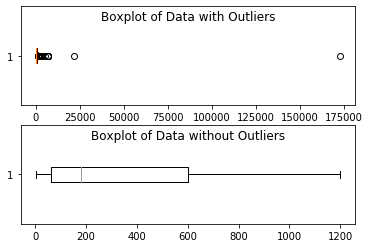

In [38]:
# your code here
# boxplot code here

# >>>>>>>>>>>Solution<<<<<<<<<<
import matplotlib.pyplot as plt

durations = cleaned_df['Duration (s)'].tolist()

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.boxplot(durations, vert=False)
ax1.set_title("Boxplot of Data with Outliers", y=0.8)

ax2.boxplot(durations, vert=False, showfliers=False)
ax2.set_title("Boxplot of Data without Outliers", y=0.8)

Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so make detailed notes of what decisions you are making and why.

In [39]:
# your code here 
# clean data 
# convert cleaned durations to seconds

# >>>>>>>>>>>Solution1<<<<<<<<<<
def find_digit(str1):
    for i in range(len(str1)):
        if str1[i].isdigit():
            return i
    return -1

# clean data
df = csv_read[csv_read['Duration'].str.contains("^(>|<|~)?\d+(-\d+)?\W(s(ec(ond)?)?|m(in(ute)?)?|h(our)?|d(ay)?|w(eek)?)s?",
                                                na=False, regex=True, case=False)].copy()
for i in df.index:
    duration = df['Duration'][i]
    cleaned_duration = ""
    while find_digit(duration) >= 0:
        start = find_digit(duration)
        end = duration.find(' ')
        time = duration[start:end]
        if time.find("-") > 0:
            t1 = time[:time.find("-")]
            t2 = time[time.find("-")+1:]
            time = (int(t1)+int(t2)) / 2.0
            
        cleaned_duration += str(time) + " "
        
        start = end+1
        end = duration.find(" ", start) if duration.find(" ", start) > 0 else len(duration)
        unit = duration[start:end][0].lower()
        
        cleaned_duration += unit + " "
        
        duration = duration[end:].strip()
    df['Duration'][i] = cleaned_duration.strip()

# convert cleaned durations to seconds
conversion = {"s":1, "m":60, "h":60*60, "d":24*60*60, "w":7*24*60*60}
for i in df.index:
    duration = df['Duration'][i]
    duration_in_seconds = 0
    while len(duration) > 0:
        start = find_digit(duration)
        end = duration.find(' ')
        time = duration[start:end]
        
        start = end+1
        end = duration.find(" ", start) if duration.find(" ", start) > 0 else len(duration)
        unit = duration[start:end][0].lower()
        
        duration_in_seconds += int(float(time)*conversion[unit])
        
        duration = duration[end:].strip()
    df['Duration'][i] = duration_in_seconds

converted_df = df.copy()
cleaned_df = converted_df.rename(columns={'Duration' : 'Duration (s)'})
cleaned_df

,Date / Time,City,State,Shape,Duration (s),Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,60,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,660,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,2700,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,210,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,480,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
...,...,...,...,...,...,...,...
433,10/1/57 16:00,Nelchina (near),AK,Unknown,180,This incident occurred about October of 1956 o...,12/7/06
435,2/1/54 02:00,Fairbanks,AK,Unknown,1140,RADAR INTERCEPT OF UFO BY USAF PILOT IN ALASKA...,1/10/09
436,7/1/49 11:00,Fairbanks,AK,Disk,120,"Enormous metallic disc in Alaska sky, 1949.",12/23/13
437,4/30/43 23:00,Bering Sea,AK,Other,3600,1943 sighting of four linearly arranged red li...,3/19/09


In [40]:
# your code here 
# clean data 
# convert cleaned durations to seconds

# >>>>>>>>>>>Solution2<<<<<<<<<<
# your code here 
# clean data 
# convert cleaned durations to seconds
import re
df = csv_read
df_clean = df[df['Duration'].notnull()]
df_clean = df_clean.reset_index()


bad_indeces_clean = []
for index, row in df_clean.iterrows():
    # remove ~, <, > from duration
    df_clean.at[index,'Duration'] = re.sub("[~<>]", "", df_clean.at[index,'Duration'])
    
    # check if Duration format is valid now allowing 1-2 minutes like format
    if len(df_clean.at[index,'Duration'].split()) == 2 and (df_clean.at[index,'Duration'].split()[0].isnumeric() or \
    re.search("[0-9]+-[0-9]+",df_clean.at[index,'Duration'].split()[0])) and \
    df_clean.at[index,'Duration'].split()[1].lower() in valid_time_measurements:
        
        # handle 1-2 minutes like format
        if re.search("[0-9]+-[0-9]+",df_clean.at[index,'Duration'].split()[0]):
            first_num = int(re.search("([0-9]+)-", df_clean.at[index,'Duration'].split()[0]).group(1))
            second_num = int(re.search("-([0-9]+)", df_clean.at[index,'Duration'].split()[0]).group(1))
            average_num = (first_num + second_num) / 2
            # sub average back where the range was before
            df_clean.at[index,'Duration'] = re.sub("[0-9]+-[0-9]+", str(average_num), df_clean.at[index,'Duration'])
                
        if row['Duration'].split()[1].lower() == 'second' or row['Duration'].split()[1].lower() == 'seconds':
            # remove seconds term
            df_clean.at[index, 'Duration'] = float(df_clean.at[index,'Duration'].split()[0])
        elif row['Duration'].split()[1].lower() == 'minute' or row['Duration'].split()[1].lower() == 'minutes':
            # convert to seconds and remove minutes term
            df_clean.at[index,'Duration'] = float(df_clean.at[index,'Duration'].split()[0])*60
        elif row['Duration'].split()[1].lower() == 'hour' or row['Duration'].split()[1].lower() == 'hours':
            # convert to seconds and remove hours term
            df_clean.at[index,'Duration'] = float(df_clean.at[index,'Duration'].split()[0])*3600
        elif row['Duration'].split()[1].lower() == 'day' or row['Duration'].split()[1].lower() == 'days':
            # convert to seconds and remove days term
            df_clean.at[index,'Duration'] = float(df_clean.at[index,'Duration'].split()[0])*3600*24
    else:
        bad_indeces_clean.append(index)

        
        

bad_indeces_clean.reverse()
# remove rows with bad formats
for index in bad_indeces_clean:
    df_clean = df_clean.drop(df_clean.index[index])

df_clean


,index,Date / Time,City,State,Shape,Duration,Summary,Posted
0,0,8/22/20 01:00,Anchorage Ak,AK,Circle,60,One craft seen much lower and moving slower th...,8/27/20
1,1,8/21/20 10:15,Anchorage,AK,Disk,660,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
3,3,8/17/20 00:30,Bethel,AK,Triangle,210,Black Triangle UFO in Alaska,8/20/20
4,4,4/9/20 10:15,54.690 163.771,AK,Changing,480,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
6,6,3/30/20 01:18,Point Makenzie,AK,Light,1800,"I don't know if I'm correct but, I just stare ...",6/25/20
...,...,...,...,...,...,...,...,...
417,429,11/1/69 19:30,Fairbanks,AK,Formation,240,Sighting of 5 objects in a PENTAGON formation ...,7/19/10
418,430,6/30/68 23:00,Anchorage,AK,Circle,60,Looked out of window before going to bed. Saw ...,9/11/15
419,431,9/15/67 00:00,Cook Inlet (at sea),AK,Light,600,I am 80 years old and want to tell what went o...,12/21/15
424,436,7/1/49 11:00,Fairbanks,AK,Disk,120,"Enormous metallic disc in Alaska sky, 1949.",12/23/13


In [41]:
# your code here 
# clean data 
# convert cleaned durations to seconds

# >>>>>>>>>>>Solution3<<<<<<<<<<
# your code here 
# clean data 

## your code here 
# clean data 
# convert cleaned durations to seconds

ufoData = csv_read


# DATAFRAME VARIABLES WITH "_1" AS A SUFFIX SIGNIFY THAT IT IS THE "CLEANED" DATASET

# filter out data that do not contain the correct unit words
ufoData_v1_1 = ufoData[ufoData["Duration"].str.contains('second') | ufoData["Duration"].str.contains('minute') | ufoData["Duration"].str.contains('hour') | ufoData["Duration"].str.contains('day')]

#filter out data that do not contain the correct form of:
# [(positive integer)_(no validated unit longer than 7 characters b/c "minutes" is the longest)]
# OR
# [(positive integer)-(positive integer)_(no validated unit longer than 7 characters b/c "minutes" is the longest)]
# we already filter out data that contains < or > anywhere
# we already filter out data that has an empty duration
#resource: https://regexr.com/
ufoData_v2_1 = ufoData_v1_1[ufoData_v1_1["Duration"].str.contains('^[1-9]\d*-*[1-9]*\d* [a-zA-Z]{1,7}$')]

#convert all durations into seconds
#resource: Piazza Question #72

for index, row in ufoData_v2_1.iterrows():
    if("-" in row[4]): # if the number has a range
        # split the data on unit and number range
        numrange = row[4].split(" ")[0]
        unit = row[4].split(" ")[1]

        # get each number separately in the given range
        num1 = int(numrange.split("-")[0])
        num2 = int(numrange.split("-")[1])

        num = (num1 + num2) / 2 # average the numbers in the range

        if("second" in unit):
            row[4] = num

        if("minute" in unit):
            row[4] = num*60
        
        if("hour" in unit):
            row[4] = num*3600

        if("day" in unit):
            row[4] = num*86400

    else: # if there is just one number (no range)
        num = int(row[4].split(" ")[0])
        unit = row[4].split(" ")[1]

        if("second" in unit):
            row[4] = num

        if("minute" in unit):
            row[4] = num*60
        
        if("hour" in unit):
            row[4] = num*3600

        if("day" in unit):
            row[4] = num*86400
    

ufoData_v2_1

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,60,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,660,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,210,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,480,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
6,3/30/20 01:18,Point Makenzie,AK,Light,1800,"I don't know if I'm correct but, I just stare ...",6/25/20
...,...,...,...,...,...,...,...
429,11/1/69 19:30,Fairbanks,AK,Formation,240,Sighting of 5 objects in a PENTAGON formation ...,7/19/10
430,6/30/68 23:00,Anchorage,AK,Circle,60,Looked out of window before going to bed. Saw ...,9/11/15
431,9/15/67 00:00,Cook Inlet (at sea),AK,Light,600,I am 80 years old and want to tell what went o...,12/21/15
436,7/1/49 11:00,Fairbanks,AK,Disk,120,"Enormous metallic disc in Alaska sky, 1949.",12/23/13


In [27]:
# your code here
# total rows in original dataset
# valid rows in your cleaned dataset

# >>>>>>>>>>>Solution3<<<<<<<<<<
# total rows in original dataset
print("Total rows in original :: %d" % len(csv_read.index))

# valid rows in your cleaned dataset
print("Valid rows :: %d" % len(ufoData_v2_1.index))

Total rows in original :: 439
Valid rows :: 313


Text(0.5, 0.8, 'Boxplot of Data without Outliers')

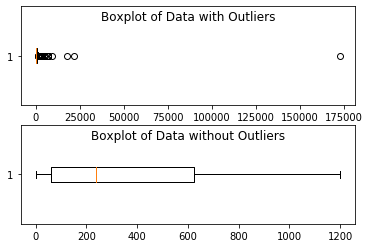

In [28]:
# your code here
# draw a boxplot for your cleaned dataset

# >>>>>>>>>>>Solution<<<<<<<<<<
# draw a boxplot for your cleaned dataset
import matplotlib.pyplot as plt

durations = cleaned_df['Duration (s)'].tolist()

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.boxplot(durations, vert=False)
ax1.set_title("Boxplot of Data with Outliers", y=0.8)

ax2.boxplot(durations, vert=False, showfliers=False)
ax2.set_title("Boxplot of Data without Outliers", y=0.8)

Now, revisit your two boxplots -- for the initial "valid" dataset and then for your cleaned dataset. What do you observe? What differences does cleaning have? Would you imagine your downstream analyses would be affected by this cleaning step? Explain.

`Discussion: Add your discussion here`

## (30 points) Part 3: Probe This, you Alien Invaders.
Finally, let's begin our initial analysis of the cleaned UFO dataset. In this section, we're going to do some plotting with matplotlib and draw some initial conclusions that may guide our future study of this UFO dataset. 

Which **shapes** are most observed?

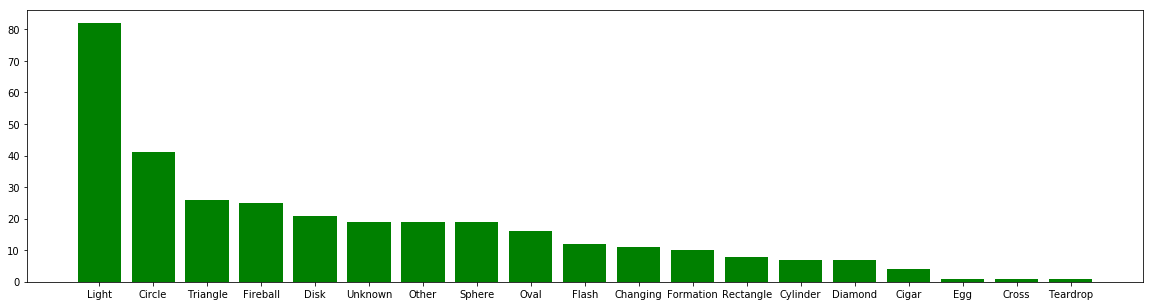

In [5]:
# your code here
# create a plot of shapes (your choice of what you consider the appropriate plot)
# >>>>>>>>>>>Solution1<<<<<<<<<<
import matplotlib.pyplot as plt
dictionary=cleanedData["Shape"].value_counts().to_dict()
plt.figure(figsize=(20,5))
plt.bar(list(dictionary.keys()), dictionary.values(), color='g')
plt.show()

the most observed ufo shape is Light shaped.


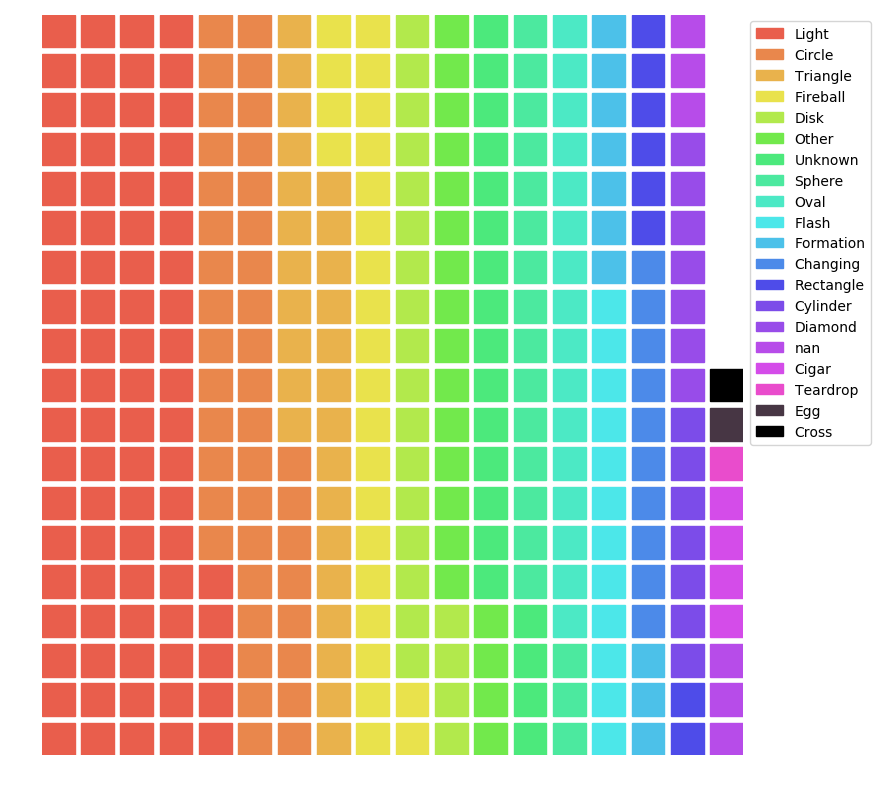

In [16]:
# your code here
# create a plot of shapes (your choice of what you consider the appropriate plot)
# >>>>>>>>>>>Solution2<<<<<<<<<<
import matplotlib.pyplot as plt
from pywaffle import Waffle

#find mode
mode = clean_data.Shape.mode()
mode = mode.tolist()
print("the most observed ufo shape is " + mode[0] + " shaped.")
#get the counts of each shape
counts = clean_data['Shape'].value_counts()
counts = counts.to_dict()

#make figure 
fig = plt.figure(
    FigureClass=Waffle,
    rows=19,
    values=counts,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(12,8), 
    dpi= 100,
    colors = ["#E95E4C","#E9874C","#E9B24C","#E9E24C", "#B2E94C", 
             "#72E94C", "#4CE97C", "#4CE99F", "#4CE9C5", "#4CE7E9",
             "#4CC1E9","#4C8AE9", "#4E4CE9", "#7C4CE9", "#984CE9",
             "#B74CE9", "#D44CE9", "#E94CCC", "#473644", "#000000" ]
)


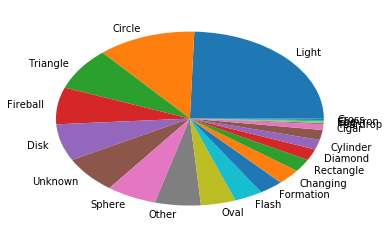

In [20]:
# your code here
# create a plot of shapes (your choice of what you consider the appropriate plot)
# >>>>>>>>>>>Solution3<<<<<<<<<<
shape_counts = cleaned["Shape"].value_counts()
plt.pie(shape_counts, labels=shape_counts.index)
plt.show()

Do different UFO shapes have different durations?

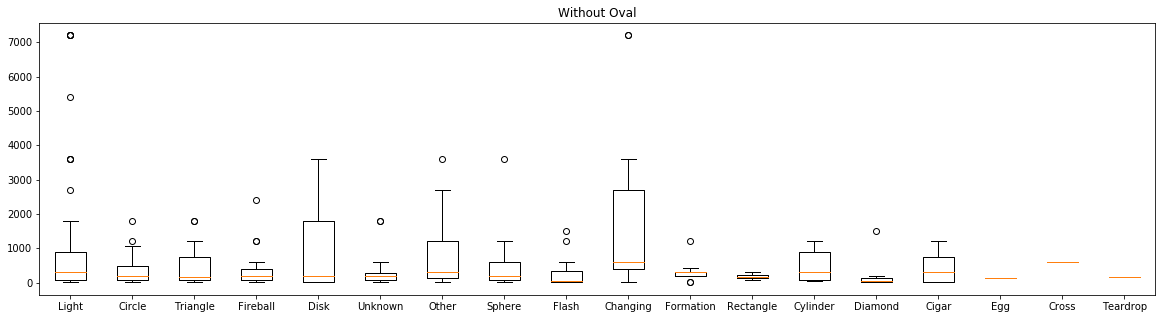

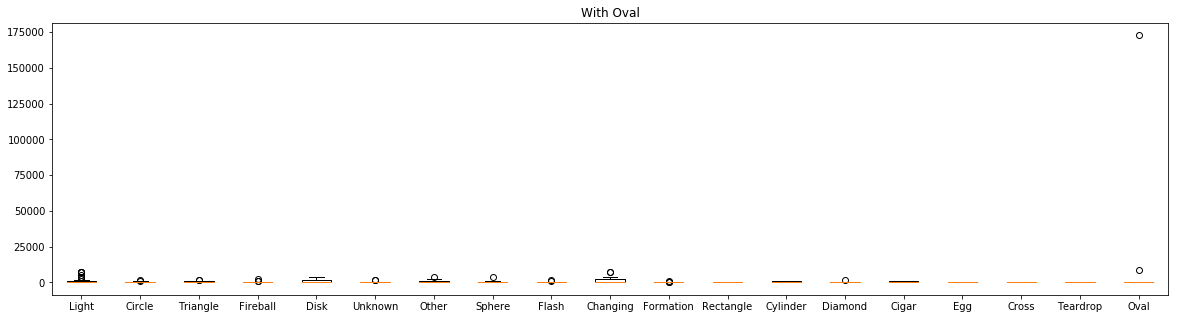

In [6]:
# your code here
# create a plot of shapes/durations
# >>>>>>>>>>>Solution1<<<<<<<<<<
rowsByShape = dict()
for key in dictionary.keys():
    if (key != "Oval"):
        rowsByShape.update({key:cleanedData.loc[cleanedData['Shape'] ==key]['Duration(in second)']})
    
fig, ax = plt.subplots(figsize=(20,5))
ax.boxplot(rowsByShape.values())

ax.set_xticklabels(rowsByShape.keys())
ax.set_title('Without Oval')
for key in dictionary.keys():
    #if (key != "Oval"):
    rowsByShape.update({key:cleanedData.loc[cleanedData['Shape'] ==key]['Duration(in second)']})
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.boxplot(rowsByShape.values())

ax1.set_xticklabels(rowsByShape.keys())
ax1.set_title('With Oval')
plt.show()

Standard deviation of the oval shape's duration: 43083.13489904335 seconds
Standard deviation of the changing shape's duration: 2824.8050788210735 seconds


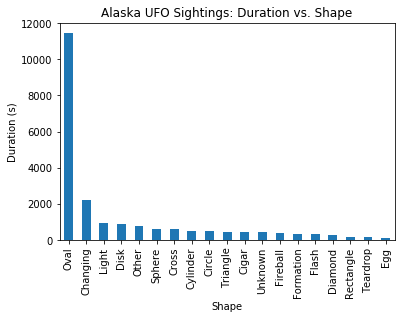

In [9]:
# your code here
# create a plot of shapes/durations
# >>>>>>>>>>>Solution2<<<<<<<<<<
df_duration_by_shape = df_cleaned.groupby(['Shape'])['Duration (s)'].mean()
df_duration_by_shape = df_duration_by_shape.sort_values(ascending=False)
df_duration_by_shape.plot(kind='bar');
plt.title('Alaska UFO Sightings: Duration vs. Shape')
plt.xlabel('Shape')
plt.ylabel('Duration (s)')

oval_stdev = df_cleaned[df_cleaned['Shape'] == "Oval"]['Duration (s)'].std()
changing_stdev = df_cleaned[df_cleaned['Shape'] == "Changing"]['Duration (s)'].std()
print("Standard deviation of the oval shape's duration:", oval_stdev, 'seconds')
print("Standard deviation of the changing shape's duration:", changing_stdev, 'seconds')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb90145fda0>,
      dtype=object)

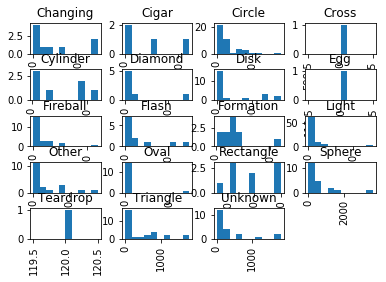

In [23]:
# your code here
# create a plot of shapes/durations
# >>>>>>>>>>>Solution3<<<<<<<<<<
dfValidated.hist(column='Duration', by='Shape')

Are there more UFO sightings in recent years than in the past?

In [ ]:
# your code here
# you might want to bucket the sightings into years
# or perhaps you have some other ideas. we are flexible.
# >>>>>>>>>>>Solution1<<<<<<<<<<

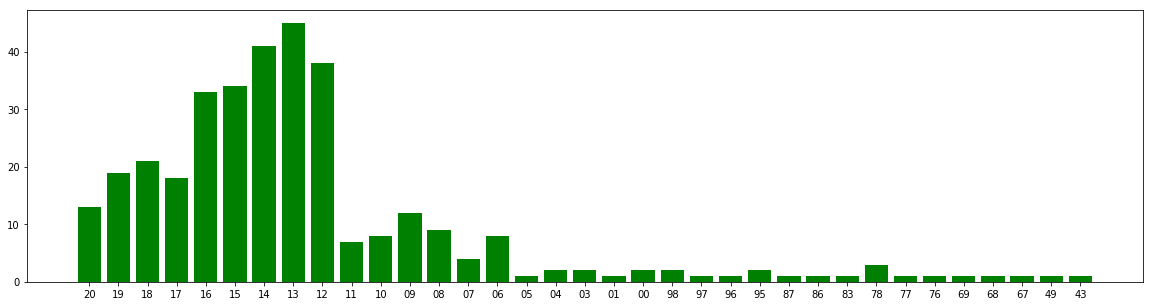

In [7]:
dateColumn = cleanedData['Date / Time']
years = []
for i in dateColumn:
    temp = i.split(' ')
    years.append(temp[0].split("/")[2])
yearfreq=[]
for word in years:
    yearfreq.append(years.count(word))

yearFreqPair = dict(zip(years, yearfreq))


plt.figure(figsize=(20,5))
plt.bar(list(yearFreqPair.keys()), yearFreqPair.values(), color='g')
plt.show()

Text(0.5,1,'Alaska UFO Sightings: Number of Reported Sightings by Year (2000-Present)')

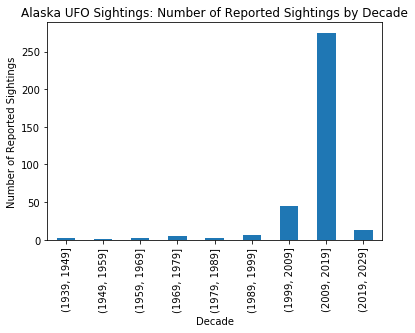

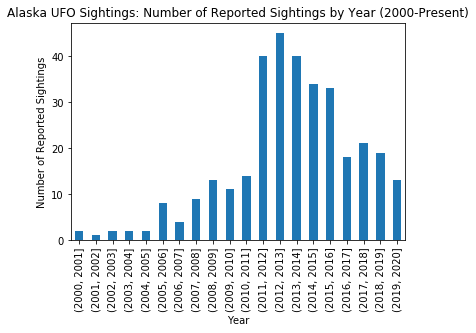

In [11]:
# your code here
# you might want to bucket the sightings into years
# or perhaps you have some other ideas. we are flexible.
# >>>>>>>>>>>Solution2<<<<<<<<<<
# fixes dates like 2/1/54 from being recognized as year 2054
# dates that could not be converted (NaT) are given a value of -1
# this will ensure they are not placed in a bin
def correct_date(x):
    if x == 'NaT':
        return -1
    elif int(x) > 2020:
        return int(x) - 100
    else:
        return int(x)

# extracting year inspired by: https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
df_cleaned['Year'] = pandas.to_datetime(df_cleaned['Date / Time']).dt.to_period('Y').astype(str)
df_cleaned['Year'] = df_cleaned['Year'].apply(correct_date)

# grouping inspired by: https://stackoverflow.com/questions/24702491/using-pythons-pandas-to-find-average-values-by-bins
# and by: https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
bins = [1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2029]
df_decades = df_cleaned['Year'].groupby(pandas.cut(df_cleaned['Year'], bins)).agg(['count'])
df_decades.plot(kind='bar', legend=False)
plt.xlabel('Decade')
plt.ylabel('Number of Reported Sightings')
plt.title('Alaska UFO Sightings: Number of Reported Sightings by Decade')

bins = range(2000, 2021)
df_years = df_cleaned['Year'].groupby(pandas.cut(df_cleaned['Year'], bins)).agg(['count'])
df_years.plot(kind='bar', legend=False)
plt.xlabel('Year')
plt.ylabel('Number of Reported Sightings')
plt.title('Alaska UFO Sightings: Number of Reported Sightings by Year (2000-Present)')

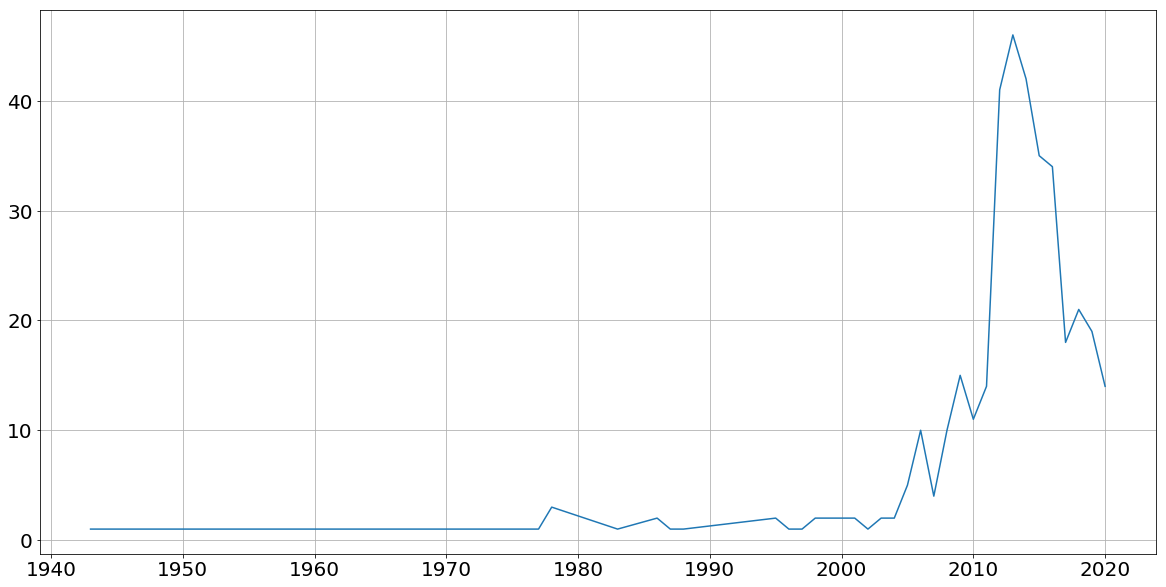

In [26]:
# your code here
# you might want to bucket the sightings into years
# or perhaps you have some other ideas. we are flexible.
# >>>>>>>>>>>Solution3<<<<<<<<<<
cleaned_dataframe_years = cleaned_dataframe_duration.copy()
cleaned_years_str = ""
for row in cleaned_dataframe_years.index:
    cleaned_years_str = str(cleaned_dataframe_years.loc[row, "Date / Time"])
    if(cleaned_years_str != 'nan'):
        pos_second_slash = cleaned_years_str.find("/", 3)
        # print(cleaned_years_str, cleaned_years_str[pos_second_slash+1:pos_second_slash+3])
        years = cleaned_years_str[pos_second_slash+1:pos_second_slash+3]
        
        if(int(years) <= 20):
            years = "20" + years
        else:
            years = "19" + years
        cleaned_dataframe_years.loc[row, 'Date / Time'] = int(years)

    else:
        # delete row
        cleaned_dataframe_years.drop(row, inplace=True)
#convert the entire column to ints to represent year
cleaned_dataframe_years = cleaned_dataframe_years.astype({"Date / Time": int})
#change the size of figure
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
frq_plot_years = cleaned_dataframe_years['Date / Time'].value_counts(sort = False).plot(kind = 'line', x = "Year", y = "Frequency", grid = True)


Based on your observations and analyses, what are some important next steps we should take?

`Discussion: Add your discussion here`

## (?? points) BONUS

Finally, we'll set aside a few bonus points (like 1-5) for any **amazing** or **inspiring** analysis you would like to do over our UFO data in addition to what we have covered so far. This bonus is designed to be a very heavy workload for very light reward. So focus on finishing the first three parts above before even considering this part. We will be extremely tough on grading this part ... so slapping together a quick figure will most likely result in 0 bonus. Good luck!

In [ ]:
## your code here